In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
df=pd.read_excel('C://Users/admin/Documents/Supermart Grocery Sales/Supermart_Grocery_Sales_cleaned.xlsx')

In [27]:
df.isnull()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Month Name,Order Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
# Drop unnecessary columns 
df = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Order Month Name'])

In [31]:
df

,Category,Sub Category,City,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu,11,8,2017
1,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu,11,8,2017
2,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu,6,12,2017
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,Tamil Nadu,10,11,2016
4,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,Tamil Nadu,10,11,2016
...,...,...,...,...,...,...,...,...,...,...,...
9989,"Eggs, Meat & Fish",Eggs,Madurai,West,945,0.16,359.10,Tamil Nadu,24,12,2015
9990,Bakery,Biscuits,Kanyakumari,West,1195,0.26,71.70,Tamil Nadu,7,12,2015
9991,Food Grains,Rice,Bodi,West,1567,0.16,501.44,Tamil Nadu,6,6,2017
9992,Oil & Masala,Spices,Pudukottai,West,1659,0.15,597.24,Tamil Nadu,16,10,2018


In [33]:
# Encode categorical columns
le = LabelEncoder()
for col in ['Category', 'Sub Category', 'City', 'Region', 'State']:
    df[col] = le.fit_transform(df[col])


In [37]:
# Define Features and Target
X = df.drop(columns=['Sales'])
y = df['Sales']

In [39]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Train the Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [45]:
# Make Predictions
y_pred = model.predict(X_test_scaled)

In [51]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 212968.92
R² Score: 0.3543


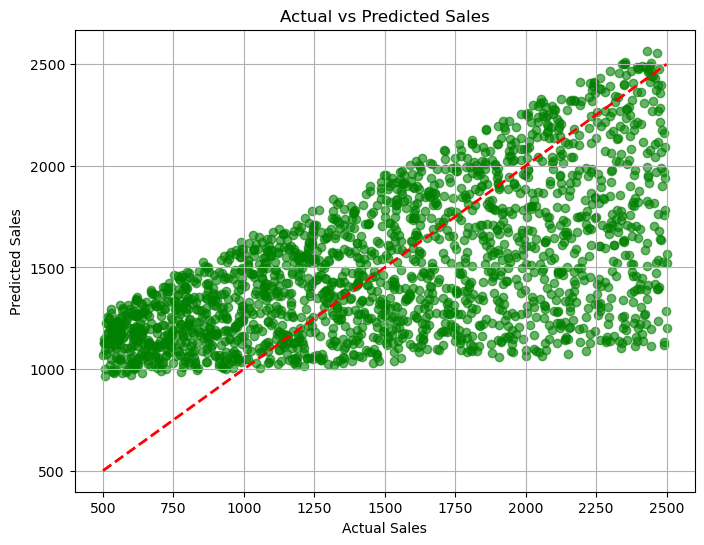

In [53]:
# 11. Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()